# HW3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from scipy.integrate import odeint
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

$\frac{F(t)}{F_0} = 1 - \frac{A_E(t)}{\pi R_*^2}$

$A_E \approx R_p^2 \arccos[\frac {x}{R_p}] - R_p x \sqrt{1-\frac{x^2}{R_p^2}}$

$x =d-R_*$

$A = A(R,d_1) + A(r,d_2)$

$A = r^2 \cos ^{-1} (\frac{d^2+r^2-R^2}{2dr}) + R^2 \cos ^{-1} (\frac{d^2+R^2-r^2}{2dR}) - \frac {1}{2}\sqrt{(-d+r+R)(d+r-R)(d-r+R)(d+r+R)}$

$d(t) = a \sqrt{\sin ^2 (\omega t) + \cos ^2 (i) \cos^2 (\omega t)}$

$P = 2 \pi \sqrt{\frac{a^3}{G(M+m)}}$

$T_{dur} = \frac{P}{\pi} \sin ^{-1} (\frac{\sqrt{(R_*+R_p)^2 - (b*R_*)^2}}{a})$

$b = \frac{a \cos (i)}{R_*}$

In [2]:
m_e = 5.9721986E24 # kilograms
m_j = 1.89813E27 # kilograms
AU= 1.496E11 # m
R_star = 695700E3 #m
r_earth = 6371.008E3 # m
r_jupiter = 69911E3 # m
A_star = np.pi*R_star**2

def period(m,a):
    M = 1.988435E30 # kg
    G = 6.674E-11 #N^2 m / kg^2
    return np.sqrt((4 * np.pi**2*a**3)/(G*(M+m)))

def omega(m,a):
    return 2*np.pi/period(m,a)

def incline_dist(i,r):
    return 2*R_star*np.sin(i*np.pi/180) - 2*r

def cross_time(D,m,a):
    return np.arcsin(D/a)/omega(m,a)

def b(a,i):
    return (a*np.cos(i*np.pi/180.))/R_star

def time(cross,inside):
    out  =80000 - (int(cross)/2 + int(inside))
    theta = np.linspace(0, 2*np.pi, int(cross))
    x1=np.zeros(out/2)
    x3=np.repeat(2*np.pi,int(inside))
    return np.append(np.append(np.append(np.append(x1,theta),x3),theta[::-1]),x1)

def area(t,r):
    AREA = np.pi*R_star**2
    return t * r**2 - r**2/2* np.sin(t/2) *np.cos(t/2)

def Relative_flux(area):
    return 1 - area / (A_star)

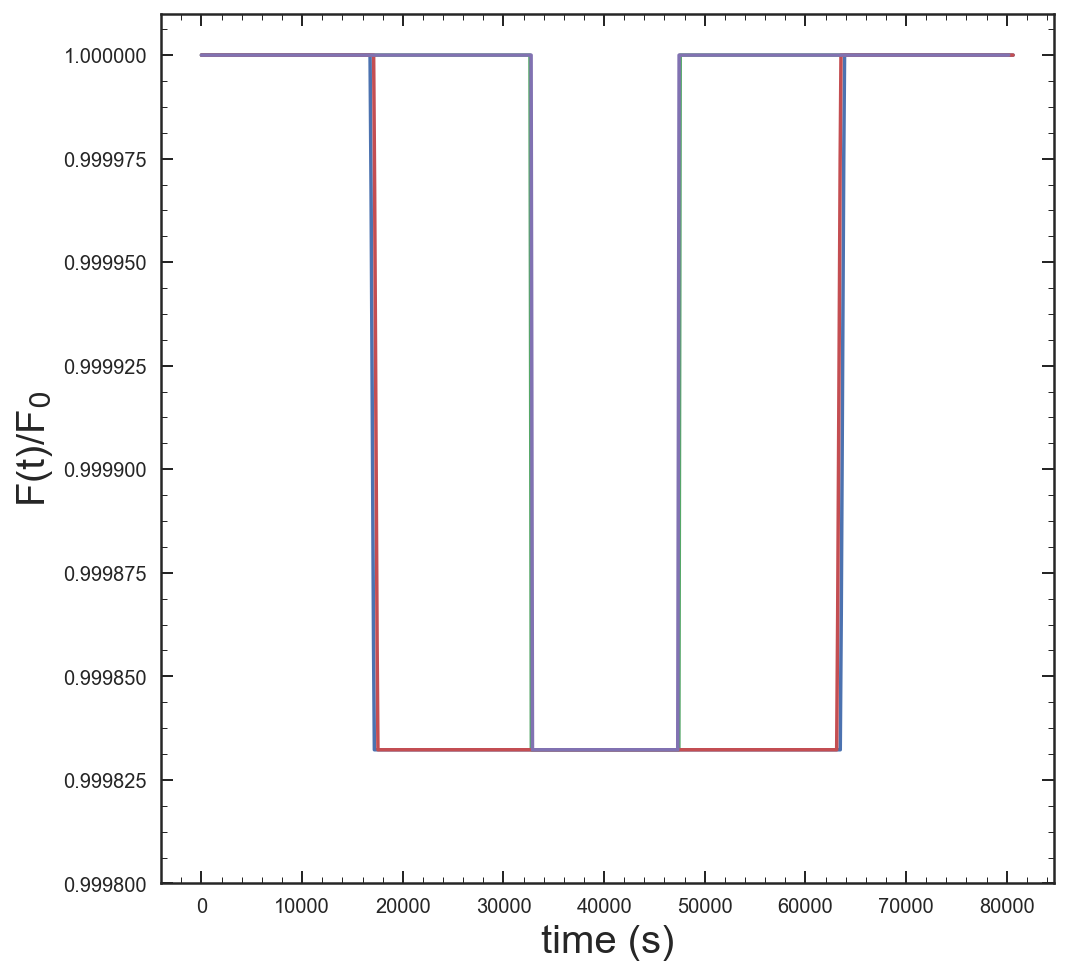

In [5]:
t1 = time(cross_time(2*r_earth,m_e,AU),cross_time(incline_dist(90,r_earth),m_e,AU))
t2 = time(cross_time(2*r_earth,m_e,AU*.1),cross_time(incline_dist(90,r_earth),m_e,AU*.1))
t3 = time(cross_time(2*r_earth,m_e,AU),cross_time(incline_dist(80,r_earth),m_e,AU))
t4 = time(cross_time(2*r_earth,m_e,AU*.1),cross_time(incline_dist(80,r_earth),m_e,AU*.1))
area1 = area(t1,r_earth)
area2 = area(t2,r_earth)
area3 = area(t3,r_earth)
area4 = area(t4,r_earth)

plt.figure(figsize=[8,8])
plt.plot(np.arange(t1.size),Relative_flux(area1))
plt.plot(np.arange(t2.size),Relative_flux(area2))
plt.plot(np.arange(t3.size),Relative_flux(area3))
plt.plot(np.arange(t4.size),Relative_flux(area4))
plt.ylim(0.9998,1.00001)
plt.xlabel('time (s)',fontsize=20)
plt.ylabel('F(t)/F$_0$',fontsize=20)

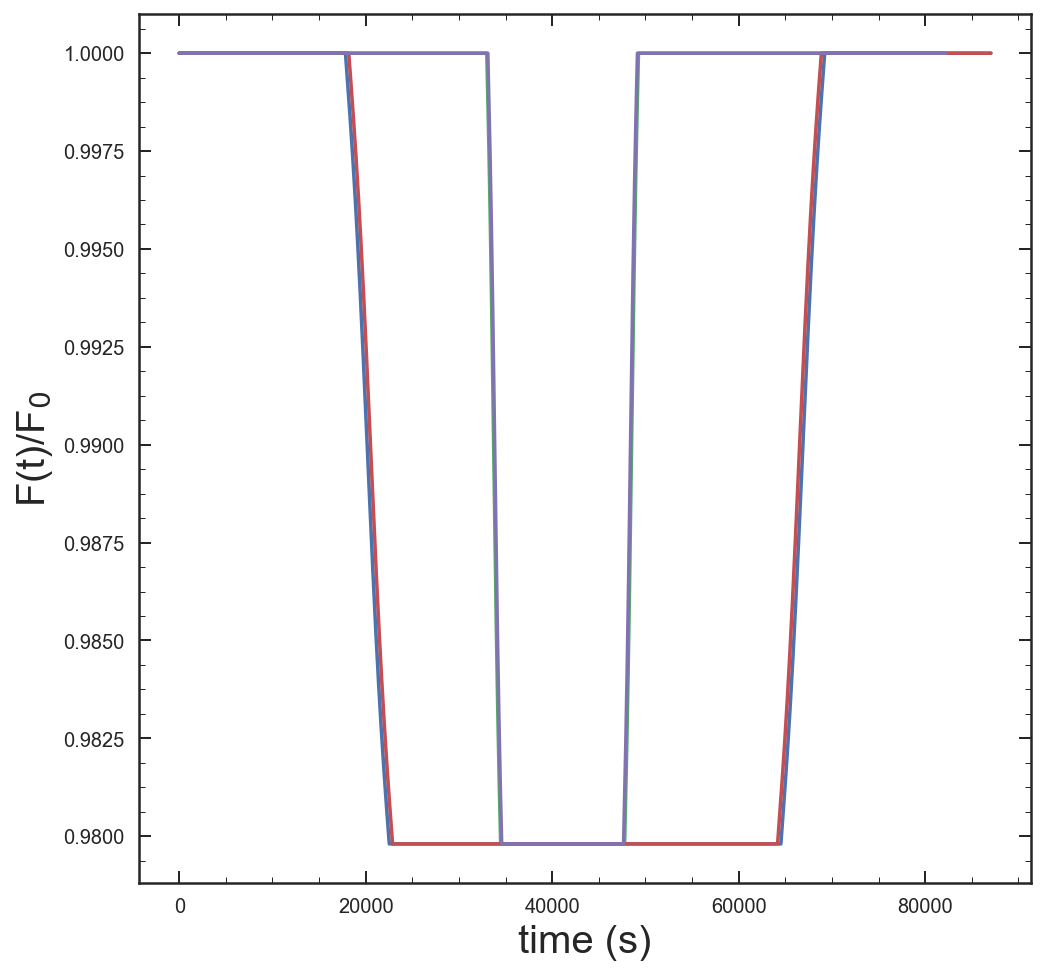

In [4]:
t1 = time(cross_time(2*r_jupiter,m_j,AU),cross_time(incline_dist(90,r_jupiter),m_j,AU))
t2 = time(cross_time(2*r_jupiter,m_j,AU*.1),cross_time(incline_dist(90,r_jupiter),m_j,AU*.1))
t3 = time(cross_time(2*r_jupiter,m_j,AU),cross_time(incline_dist(80,r_jupiter),m_j,AU))
t4 = time(cross_time(2*r_jupiter,m_j,AU*.1),cross_time(incline_dist(80,r_jupiter),m_j,AU*.1))
area1 = area(t1,r_jupiter)
area2 = area(t2,r_jupiter)
area3 = area(t3,r_jupiter)
area4 = area(t4,r_jupiter)

plt.figure(figsize=[8,8])
plt.plot(np.arange(t1.size),Relative_flux(area1))
plt.plot(np.arange(t2.size),Relative_flux(area2))
plt.plot(np.arange(t3.size),Relative_flux(area3))
plt.plot(np.arange(t4.size),Relative_flux(area4))
plt.xlabel('time (s)',fontsize=20)
plt.ylabel('F(t)/F$_0$',fontsize=20)

# #2

NFW profile: 

$\rho_0$ - scale denisty

$r_0$ - scale radius

$\rho (r) = \frac {\rho_0}{(r/r_0)(1+r/r_0)^2}$

$\phi_0=4 \pi G \rho_0 r_0^2$

$L_0 = r_0 \sqrt{\Phi_0}$

Burket profile:

$\rho_b$ - scale denisty

$r_b$ - scale radius

$\rho (r) = \frac {\rho_b}{(1+r/r_b)(1+r^2/r_b^2)}$

$\phi_b=4 \pi G \rho_b r_b^2$

$L_b = r_b \sqrt{\Phi_b}$

Equations of motion:

$\frac{L^2}{r^2} \frac{d}{d \theta} (\frac{1}{r^2} \frac{dr}{d\theta}) - \frac{L^2}{r^3} = - \frac{d \phi}{dr}$

$u=\frac{1}{r}$

$\frac{d^2u}{d\theta^2}+u=\frac{1}{L^2u^2} \frac{d\phi}{dr} (\frac{1}{u})$

$E = \frac{1}{2} \dot{r}^2 + \frac{1}{2} (r \dot{\theta})^2 \phi (r)$

For a NFW potential, \begin{align}\rho_{NFW}(r)&=\frac{\rho_0}{(r/r_0)(1+r/r0)^2} \ \frac{d\Phi{NFW}}{dr}(r)&=G\frac{M(r)}{r^2} \ &=4\pi G\rho_0r_0\frac{1}{x^2}\left[\text{ln}(1+x)-\frac{x}{1+x}\right], ~x=r/r_0 \end{align}

For Burkest, \begin{align}\rho_{bur}(r)&=\frac{\rho_b}{(1+r/r_b)(1+r^2/rb^2)} \ \frac{d\Phi{bur}}{dr}(r)&= \pi G\rho_b r_b\frac{1}{x^2}\left[2\text{ln}(1+x)-\text{ln}(1+x^2)+2\text{tan}^{-1}x\right], ~x=r/r_b \end{align}

In [18]:
r = np.linspace(0,1,1000)
p0=1
r0=1
pb=1
rb=1
G = 6.674E-11 #N^2 m / kg^2

def NFW(r):
    return p0/( (r/r0) * (1+r/r0)**2 )

def Burket(r):
    return pb/( (1+r/rb) * (1+r**2/rb**2) )

def Angle(profile='0'):
    if profile == '0':
        return 4*np.pi*p0*r0**2
    if profile == 'b':
        return 4*np.pi*pb*rb**2

def L(profile='0'):
    if profile == '0':
        return r0*np.sqrt(Angle(profile = '0'))
    if profile == 'b':
        return rb*np.sqrt(Angle(profile = 'b'))


In [ ]:
def DEs(dt):
    u = I
    
    du = 2*v + x - (mu1*(x + mu2)/r1** 3 + mu2*(x-mu1)/r2** 3)
    
    return [u, du, ]

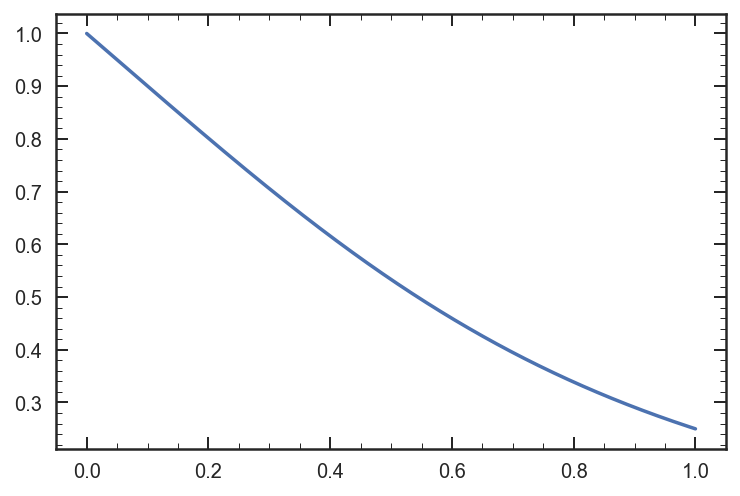

In [16]:
# plt.plot(r,NFW(r))
plt.plot(r,Burket(r))